In this homework, we will analyze data from A/B tests of headlines conducted by Upworthy from January 2013 to April 2015 to study whether the language used in the headline determines the number of people that will read the associated news piece. The homework contains four tasks: in task 1, we will process the data; in task 2, we will extract meaningful signals from the data; in task 3, we will test whether the language of headlines impacts their success; and in task 4, we will explore the heterogeneity of this effects (e.g., does it vary through time?).


### **What is an A/B test?** 
A/B tests are experiments that compare two scenarios (e.g., scenario A vs. scenario B). 
They test subjects' responses to each of the variants to determine which is more effective ([read more about A/B tests on Wikipedia](https://en.wikipedia.org/wiki/A/B_testing)). 
A/B tests allow us to draw conclusions about the different scenarios by randomizing exposure to them, e.g., one could flip a coin and assign a user to scenario A if it lands heads and to B if it lands tails. 
Since exposure is randomized, we can be confident that the scenarios are the sole explanation for statistically significant differences in subjects' responses (if they exist). 
In theory, A/B testing refers to an experiment that compares two scenarios; however, in practice, the term is also used when we compare multiple scenarios (e.g., A vs. B vs. C), although the more precise terminology would be to call such an experiment a "multinomial test."

### **How were A/B tests used by Upworthy?** 
Upworthy used A/B testing to increase news readership, conducting experiments for each published news piece. 
In each experiment, they created multiple "packages" of stimuli, varying headlines, images, excerpts, and ledes for the same news piece. 
Different "packages" were shown on their (now defunct) website to engage users with the news pieces they produced. Upworthy found "the best" package by conducting A/B tests, showing different packages to different users, and measuring how often users clicked on each version. 
Below, we show three "packages" used by Upworthy in an experiment, each with a different headline for the same news piece. 
Upworthy randomized users that visited their website saw one of the three versions of the headline below. Then, they measured the percentage of times users in each scenario clicked to read the news. 
The headline with the highest percentage of clicks per view (click through rate) was then declared the "winner" and became the default for all visitors.

![Example A/B test](example.png)

 ### **Where does this data come from?** 
 
 From a paper [1].

[1] Matias, J.N., Munger, K., Le Quere, M.A. et al. The Upworthy Research Archive, a time series of 32,487 experiments in U.S. media. Sci Data 8, 195 (2021). https://doi.org/10.1038/s41597-021-00934-7

### **Where can I find this data?**  

You can find it in the `/data/` folder.

### **Terminology**

- **News piece:** A news article. In the dataset considered, these were all produced by Upworthy.
- **Package:** The set of visual stimuli inviting the user to read an article. The figure above shows a package with a headline and an image. At times, there was an excerpt of the article also shown in the package and/or the lede, i.e., ["the introductory section of a news story that is intended to entice the reader to read the full story."](https://www.merriam-webster.com/words-at-play/bury-the-lede-versus-lead#:~:text=In%20journalism%2C%20the%20lede%20refers,machines%20began%20disappearing%20from%20newsrooms.)
- **Experiment:** Each experiment is an A/B test (or multinomial test, to be more precise) comparing how users reacted to different "packages." Experiments measured two things: 1) how many users were shown each package; and 2) how many individuals clicked each package.

### **Data description**

| Column name          | Description                                                                                                                                                                                       |   |   |   |
|----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---|---|---|
| created_at           | Time the package was created (timezone unknown)                                                                                                                                                   |   |   |   |
| test_week            | Week the package was created, a variable constructed by the archive creators for stratified random sampling                                                                                       |   |   |   |
| clickability_test_id | The test ID. Viewers were randomly assigned to packages with the same test ID                                                                                                                     |   |   |   |
| impressions          | The number of viewers who were assigned to this package. The total number of participants for a given test is the sum of impressions for all packages that share the same clickability_test_id    |   |   |   |
| headline             | The headline being tested                                                                                                                                                                         |   |   |   |
| eyecatcher_id        | Image ID. Image files are not available. Packages that shared the same image have the same eyecatcher_id                                                                                          |   |   |   |
| clicks               | The number of viewers (impressions) that clicked on the package. The clickrate for a given package is the number of clicks divided by the number of impressions                                   |   |   |   |
| excerpt              | Article excerpt                                                                                                                                                                                   |   |   |   |
| lede                 | The opening sentence or paragraph of the story                                                                                                                                                    |   |   |   |
| slug                 | Internal name for the web address                                                                                                                                                                 |   |   |   |
| share_text           | Summary for display on social media when the article is shared. This was not shown in tests, since tests were conducted on the Upworthy website                                                   |   |   |   |
| square               | When used, part of the same social media sharing suggestion as the share text                                                                                                                     |   |   |   |
| significance         | NOT an estimate of statistical significance; a complex, inconsistent calculation that compared the clicks on a package to the clicks on all previous packages that were fielded on the same pages |   |   |   |
| first_place          | Along with significance, shown to editors to guide decisions about what test to choose                                                                                                            |   |   |   |
| winner               | Whether a package was selected by editors to be used on the Upworthy site after the test                                                                                                          |   |   |   |
| updated_at           | The last time the package was updated in the Upworthy system                                                                                                                                      |   |   |   |


## Task 1: Getting familiar with the data

Your first task is to conduct initial analyses to understand the data and process it in a way that will allow us to more easily answer our key question: *how does the language of a headline determine its success?*

## Task 1.1
Load the data into memory using pandas and print the first lines to get a sense of it.

In [1]:
from numpy import NaN
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations, permutations
import requests
import nltk
nltk.download('punkt')

# Load the data into memory
data = './data/'
df = pd.read_csv(data + 'upworthy.csv.gz', compression='gzip', header=0, error_bad_lines=False, parse_dates=['created_at', 'updated_at'])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/andreeanica/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/bf/lk1spfcs3mxd4z29x427vg500000gn/T/ipykernel_61223/2903657792.py:11: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(data + 'upworthy.csv.gz', compression='gzip', header=0, error_bad_lines=False, parse_dates=['created_at', 'updated_at'])


## Task 1.2

Each experiment comparing different versions of the same news piece ("packages") has a unique identifier (`clickability_test_id` column).
Calculate how many different experiments were conducted in this dataset and, on average, how many packages were considered per experiment.
Last, plot the distribution of packages per experiment with a visualization of your choice.

Number of unique experiments: 4822
The average number of packages per experiment: 4.2727084197428455


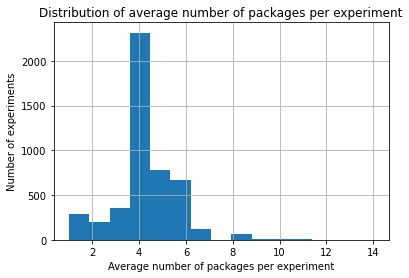

In [2]:
# Get the number of unique experiments, by droping the duplicated experiment ids from the dataframe
no_unique_experiments = df.clickability_test_id.drop_duplicates().count()
print("Number of unique experiments: " + str(no_unique_experiments))

# Compute the average number of packages per experiment
packages_per_experiment = df.groupby('clickability_test_id').apply(lambda x : pd.Series({'packages_per_experiment' : x['clickability_test_id'].count()}))
average_packages_per_experiment = packages_per_experiment.packages_per_experiment.mean();
print("The average number of packages per experiment: " + str(average_packages_per_experiment))


# Plot the average number of packages per experiment
packages_per_experiment['packages_per_experiment'].hist(bins = 15)

plt.xlabel('Average number of packages per experiment')
plt.ylabel('Number of experiments')
plt.title('Distribution of average number of packages per experiment');

## Task 1.3

A common way to measure success in online A/B tests is what is called "the clickthrough rate."
Given that often A/B tests are created to find what engages users (here, "packages" of headlines, images, etc), we would expect that a "good" package makes people click often.
Create a column named `ctr` by dividing the number of clicks a package received (`clicks` column) by the number of impressions it received (`impressions` column).

In [3]:
# Add click-through rate column.
df['ctr'] = df.clicks / df.impressions

## Task 1.4

Packages varied any combination of the headline (`headline` column), the excerpt (`excerpt`), the first sentence of the article (`lede`), and the image that illustrates the news piece (`eyecatcher_id`, a hash per image).
But we want to isolate the effect of the headline on the clickthrough rate. To do that, create a new dataframe where you filter all experiments where only one headline is present.
Print the length of this new dataframe and how many experiments were discarded in the filtering process.

In [4]:
filter_headline = df.groupby('clickability_test_id').filter(lambda x : (len(set(x.headline)) != 1))

print("The length of the original dataframe: " + str(len(df)))
print("The length of the new data frame after filtering the headlines: " + str(len(filter_headline)))

no_unique_experiments = filter_headline.clickability_test_id.drop_duplicates().count()
print("Discarded experiments after filtering the headlines: " + str(len(set(df.clickability_test_id)) - no_unique_experiments))

The length of the original dataframe: 20603
The length of the new data frame after filtering the headlines: 11600
Discarded experiments after filtering the headlines: 2236


## Task 1.5

For comparison, repeat the procedure described in **T1.4** with the `eyecatcher_id` column, i.e., create a dataframe considering only experiments that vary the image.
Again, print the length of this new dataframe and how many experiments were discarded in the filtering process.

In [5]:
eyecatcher_filter = df.groupby('clickability_test_id').filter(lambda x : len(set(x.eyecatcher_id)) != 1)
print("The length of the new data frame after filtering the eyecatcher_id: " + str(len(eyecatcher_filter)))

no_unique_experiments = eyecatcher_filter.clickability_test_id.drop_duplicates().count()
print("Discarded experiments after filtering the eyecatcher_id: " + str(len(set(df.clickability_test_id)) - no_unique_experiments))

The length of the new data frame after filtering the eyecatcher_id: 7930
Discarded experiments after filtering the eyecatcher_id: 3108


## Task 1.6

**Discuss:** Considering the answers to questions **T1.4** and **T1.5**, what can we say about the different versions of the news tested by Upworthy?

Using the first type of filtering from 1.4, we discard approximately 45% of unique experiments, whereas for the second filtering type from 1.5, discard almost 65% of unique experiments. That means that using the second filter we eliminate roughly 20% more unique experiments. In other words, the headline is varied more often in an experiment than the image.

## Task 1.7

For our subsequent analysis, we want to compare the causal effect of headlines on the success of a news piece.
For that, we can compare pairs of packages with the same `eyecatcher_id`, `lede`, and `excerpt`, but different `headlines`.
Note that this means that if an experiment considered 5 different headlines and did not vary any other stimulus, we would have 5C2 (i.e., 5 choose 2, 10) pairs to consider.
Create a dataset where:
- each row corresponds to a pair of packages with different `headline` but the same `eyecatcher_id`, `lede`, and `excerpt`.
- there are columns containing the headlines of each of the news versions (`headline1`, `headline2`) and the clickthrough rate of each of the news versions (`ctr1`, `ctr2`).
- the columns `headline1` and `ctr1` contain the data associated with the news version with the highest clickthrough rate. Print the first columns of your newly created dataframe, as well as its length.
-  the columns where the two news pieces had exactly the same clickthrough rate should be filtered out (this is for simplicity's sake).
-  the column `date_created` contains the date when the news version with the highest clickthrough rate was created.

In [6]:

# Remove from the original dataframe the packages from the same experiment with same eyecatcher_id, lede and excerpt values,
# where there is the same headline
different_headlines = df.groupby(['clickability_test_id','eyecatcher_id', 'lede', 'excerpt']).filter(lambda x : len(set(x.headline)) != 1)
different_headlines = different_headlines.reset_index()

# Maintaining the same grouping as above, sort the rows from the specific group descending based on clickthrough rate
# After that perform combinations between (headline, ctr, created_at)
different_headlines = different_headlines.groupby(['clickability_test_id','eyecatcher_id', 'lede', 'excerpt']).apply(lambda x : pd.Series({'headline1_aux' : [a for (a, b) in list(combinations(list(zip(x.sort_values('ctr', ascending=False)['headline'].values, x.sort_values('ctr', ascending=False)['ctr'].values, x.sort_values('ctr', ascending=False)['created_at'].values)),2))],
                                                                                                                      'headline2_aux' : [b for (a, b) in list(combinations(list(zip(x.sort_values('ctr', ascending=False)['headline'].values,x.sort_values('ctr', ascending=False)['ctr'].values)),2))]}));
different_headlines = different_headlines.apply(pd.Series.explode).reset_index()

# Create columns as the headline1 has higher clickthrough rate that headline2 and headline1 != headline2
headline_pairs = pd.DataFrame({'headline1': [h for h,_,_ in different_headlines.headline1_aux],
                            'ctr1': [ctr for _,ctr,_ in different_headlines.headline1_aux],
                            'headline2':  [h for h,_ in different_headlines.headline2_aux],
                            'ctr2': [ctr for _,ctr in different_headlines.headline2_aux],
                            'date_created': [t for _,_,t in different_headlines.headline1_aux]})
headline_pairs = headline_pairs.apply(pd.Series.explode).reset_index()

headline_pairs = headline_pairs[headline_pairs.headline1 != headline_pairs.headline2];
print(headline_pairs)
headline_pairs = headline_pairs[headline_pairs.ctr1 != headline_pairs.ctr2];

print("The length of the new dataset after creating the pairs is: " + str(len(headline_pairs)));


       index                                          headline1      ctr1  \
0          0  Mr. President, I'm Not Mad. I'm Just Disappoin...  0.019770   
1          1  If You Think Hillary Had A Rough Campaign, You...  0.012807   
2          2  If You Think Hillary Had A Rough Campaign, You...  0.012807   
3          3  MAD RESPECT: This Brave Woman Is Running For P...  0.011216   
4          4  Feminist Confuses Fox News Host By Suggesting ...  0.024444   
...      ...                                                ...       ...   
15667  15667  Ever heard of the 'Second Civil War'? Federal ...  0.007287   
15668  15668  The West Virginia Mine Wars are buried in the ...  0.005994   
15669  15669  The West Virginia Mine Wars are buried in the ...  0.005994   
15670  15670  Ever heard of the 'Second Civil War'? We can't...  0.004915   
15671  15671  They spent 4 days in the swamp looking for a c...  0.015304   

                                               headline2      ctr2  \
0    

## Task 1.8

To get a sense of the impact of headline change, measure the average difference per pair between the most clicked-through (`ctr1`) and the least clicked-through headline (`ctr2`), as well as the average clickthrough rate for the least clicked through headline (`ctr2`).

In [7]:
ctr_diff = headline_pairs['ctr1'] - headline_pairs['ctr2']

print("The average difference between per pair: " + str(sum(ctr_diff) / len(ctr_diff)))
print("The average click through rate for ctr2 is: " + str(sum(headline_pairs['ctr2']) / len(headline_pairs['ctr2'])))

The average difference between per pair: 0.004131570860971892
The average click through rate for ctr2 is: 0.011020541327583153


## Task 1.9

**Discuss:** Considering your answer to **T1.8**, and assuming the average differences in clickthrough rates between pairs are statistically significant, do you think that headlines are impactful in the news business? Justify with the data.

In [8]:
from scipy.stats import ttest_rel, ttest_ind

print("The average click through rate for headline1 is: " + str(sum(headline_pairs['ctr1']) / len(headline_pairs['ctr2'])))
ttest_rel(headline_pairs['ctr1'], headline_pairs['ctr2'], alternative='two-sided')

The average click through rate for headline1 is: 0.015152112188554973


Ttest_relResult(statistic=112.11782678020303, pvalue=0.0)

The p-value being less than 0.05 means that we can reject the null-hypothesis and assume that the difference between these 2 samples is different from 0.

We can observe that there is almost 27% difference between click-through rate between headline1 and headline2. Which means that the headlines might have a significant impact in the news business.

## Task 2: Extracting signals from the data

Your second task is to extract meaningful signals from the data. 
We start this task from the dataset obtained in **T1.7**. 
Recall that we have one A/B test per row with the clickthrough rate of two news pieces that differ only in their headline. 
We refer to the version with the higher clickthrough rate as the "winner" and the version with the lower as the "loser." 
(Note that this is not the same as the column `winner` in the original data, which captures a similar concept but considering the original experiments, where multiple comparisons were made!)

## Task 2.1

Using the function provided below, count the number of words in each headline, creating columns `numwords1` and `numwords2` corresponding to the number of words in the winner and loser headlines.

In [9]:
# 2.1 (provided code)
def count_words_simple(x):
    return len(x.split(" "))

str_test = "How many words are here?"
print(str_test, count_words_simple(str_test))

# Compute the number of words per headline
headline_pairs['numwords1'] = headline_pairs.headline1.map(lambda x : count_words_simple(x))
headline_pairs['numwords2'] = headline_pairs.headline2.map(lambda x : count_words_simple(x))

headline_pairs

How many words are here? 5


,index,headline1,ctr1,headline2,ctr2,date_created,numwords1,numwords2
0,0,"Mr. President, I'm Not Mad. I'm Just Disappoin...",0.019770,"Mr. President, I'm Not Mad. I'm Just Disappoin...",0.016595,2013-02-07 05:42:25.000,9,15
1,1,"If You Think Hillary Had A Rough Campaign, You...",0.012807,MAD RESPECT: This Brave Woman Is Running For P...,0.011216,2013-02-19 19:03:39.000,15,17
2,2,"If You Think Hillary Had A Rough Campaign, You...",0.012807,This Brave Woman Is Running For President Of A...,0.009410,2013-02-19 19:03:39.000,15,11
3,3,MAD RESPECT: This Brave Woman Is Running For P...,0.011216,This Brave Woman Is Running For President Of A...,0.009410,2013-02-19 19:05:45.000,17,11
4,4,Feminist Confuses Fox News Host By Suggesting ...,0.024444,Sean Hannity Thinks Telling Men Not To Attack ...,0.013675,2013-03-09 06:59:29.000,15,11
...,...,...,...,...,...,...,...,...
15667,15667,Ever heard of the 'Second Civil War'? Federal ...,0.007287,Ever heard of the Battle of Blair Mountain? 13...,0.004196,2015-04-28 19:32:45.665,16,16
15668,15668,The West Virginia Mine Wars are buried in the ...,0.005994,Ever heard of the 'Second Civil War'? We can't...,0.004915,2015-04-28 19:30:59.172,17,18
15669,15669,The West Virginia Mine Wars are buried in the ...,0.005994,Ever heard of the Battle of Blair Mountain? 13...,0.004196,2015-04-28 19:30:59.172,17,16
15670,15670,Ever heard of the 'Second Civil War'? We can't...,0.004915,Ever heard of the Battle of Blair Mountain? 13...,0.004196,2015-04-28 19:32:30.132,18,16


## Task 2.2

Using the dictionary of pronouns provided below, create indicator variables corresponding to each set of pronouns (e.g., first-person singular may yield columns `first_person_singular1` and `first_person_singular2` for the headlines in each A/B test).
Each indicator variable in the dataframe should equal 1 if the corresponding headline uses the corresponding type of pronoun and 0 otherwise.
Your code should be agnostic to lower/upper case.

In [10]:
import re
# 2.2 (provided code)
feature_wordsets = dict([
    # https://en.wikipedia.org/wiki/English_personal_pronouns
    ('first_person_singular', ['i', 'me', 'my', 'mine', 'myself',
                               "i'd", "i'll", "i'm", "i've", 'id', 'im', 'ive']),
    ('first_person_plural', ['we', 'us', 'our', 'ours', 'ourselves',
                              "we'd", "we'll", "we're", "we've",]),
    ('second_person', ['you','your','yours','yourself',
                              "ya", "you'd", "you'll", "you're", "you've", 'youll', 'youre', 'youve',
                              'yourselves']),
    ('third_person_singular', ['he','him','his','himself',
                               "he'd", "he's", 'hes',
                               'she','her','hers','herself',
                               "she'll", "she's", 'shes',
                               'it','its','itself',
                               'themself']),
    ('third_person_plural', ['they','them','their','theirs','themselves',
                              "they'd", "they'll", "they've", 'theyll', 'theyve'])
])


for key in feature_wordsets.keys():
    headline_pairs[key + "1"] = headline_pairs.headline1.apply(lambda x : int(len([y for y in x.split(" ") if y.lower() in feature_wordsets[key]]) > 0))
    headline_pairs[key + "2"] = headline_pairs.headline2.apply(lambda x : int(len([y for y in x.split(" ") if y.lower() in feature_wordsets[key]]) > 0))

# Extract the information about the positive and negative sentiment
pattern = ';.*\n'
positive_content = requests.get('https://ptrckprry.com/course/ssd/data/positive-words.txt')
positive_wordset = re.sub(pattern, '', positive_content.text).split('\n')[1:-1]
negative_content = requests.get('https://ptrckprry.com/course/ssd/data/negative-words.txt')
negative_wordset = re.sub(pattern, '', negative_content.text).split('\n')[1:-1]

## Task 2.3

One easy way to classify sentiment is simply to match negative or positive words.
Use the linked lists of words ([positive][1], [negative][2]) to obtain "positive sentiment" and "negative sentiment" scores for each headline. Create columns `positive1`/`positive2` and `negative1`/`negative2` containing indicator variables for positive and negative sentiment, i.e., A headline has a "positive sentiment" (or negative) score equal 1 if it contains at least one positive (or negative) sentiment word on the list. Otherwise, its "positive sentiment" (or negative) score equals 0.

[1]: https://ptrckprry.com/course/ssd/data/positive-words.txt
[2]: https://ptrckprry.com/course/ssd/data/negative-words.txt

In [11]:
# Create the indicator for positive sentiment for the both headline columns
headline_pairs['positive1'] = headline_pairs.headline1.apply(lambda x : int(len([y for y in positive_wordset if y in x]) > 0))
headline_pairs['positive2'] = headline_pairs.headline2.apply(lambda x : int(len([y for y in positive_wordset if y in x]) > 0))

# Create the indicator for negative sentiment for the both headline columns
headline_pairs['negative1'] = headline_pairs.headline1.apply(lambda x : int(len([y for y in negative_wordset if y in x]) > 0))
headline_pairs['negative2'] = headline_pairs.headline2.apply(lambda x : int(len([y for y in negative_wordset if y in x]) > 0))

## Task 3: Estimating the effect of language on headline success

Your third task revolves around the question *how does language impact headlines' success?*

## Task 3.1

First, we examine whether the winner headlines have more or fewer words than the loser headline. Conduct an independent sample t-test and paired t-test (see [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind); for the independent sample t-test, assume equal variance). Also, calculate and print the mean difference between the number of words in the winner and the loser headlines.

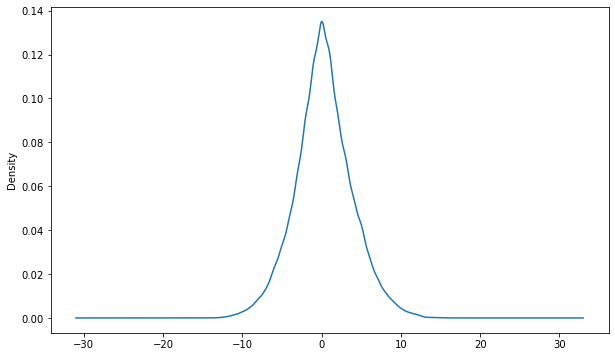

In [ ]:
fig = plt.figure(figsize=(10, 6))
plot = (different_headlines.numwords1 - different_headlines.numwords2).plot.density()  # somewhat normally distributed

<a id="independent-paired-ttest-number-of-words-in-headlines"><h4>Independent and paired t-tests of number of words in winning and losing headline</h4></a>

In [ ]:
from scipy.stats import stats
indpd_results = stats.ttest_ind(different_headlines.numwords1, different_headlines.numwords2, alternative='two-sided')
paired_results = stats.ttest_rel(different_headlines.numwords1, different_headlines.numwords2, alternative='greater')

print(f"Independent sample t-test produced t-value:\t {indpd_results.statistic} \tand p-value: \t{indpd_results.pvalue},\n" \
f"Paired sample t-test produced t-value:\t\t {paired_results.statistic} \tand p-value: \t{paired_results.pvalue}")
print("Mean difference between the number of words in the winner and loser headlines is {:.8f}, {:.8f}".format(different_headlines.numwords1.mean(), different_headlines.numwords2.mean()))

Independent sample t-test produced t-value:	 7.935918556156672 	and p-value: 	2.158660099169889e-15,
Paired sample t-test produced t-value:		 9.58714274727263 	and p-value: 	5.193631574089642e-22
Mean difference between the number of words in the winner and loser headlines is 15.11186981, 14.83707722


## Task 3.2

**Discuss:** Are longer headlines more successful? Justify.

For the sampled t-test where we assume equal variance we obtained p-value smaller 0.05, which indicates that the mean of distributions of winning and loosing headlines are different.
After performing paired t-test with alternative hypothesis stating that the length of winning headlines is greater that the loosing ones, we obtained a p-value smaller than threshold (0.05), thus we reject the null hypothesis in favor of alternative ones. Thus we conclude that the longer headlines are more successful.

## Task 3.3

The [t-statistic](https://en.wikipedia.org/wiki/T-statistic) is the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error. In a t-test, the higher the t-statistic, the more confidently we can reject the null hypothesis. Use `numpy.random` to create four samples, each of size 30:
- $X \sim Uniform(0,1)$
- $Y \sim Uniform(0,1)$
- $Z = X/2 + Y/2 + 0.1$
- $K = Y + 0.1$


In [ ]:
def get_samples():
    X = np.random.uniform(0, 1, 30)
    Y = np.random.uniform(0, 1, 30)
    Z = X/2 + Y/2 + 0.1
    K = Y + 0.1
    return X, Y, Z, K
X, Y, Z, K = get_samples()

## Task 3.4

**Discuss:** What are the expected values and the variance of $X$, $Y$, $Z$, and $K$? (You don't need to justify them!)

In [ ]:
STAT_DESC = "Sample named: {} has mean equal to: {:.8f}, variance equal to: {:.8f}"

def get_mean_and_variance(sample, sample_name):
    print(STAT_DESC.format(sample_name, sample.mean(), np.var(sample)))

get_mean_and_variance(X, "X");get_mean_and_variance(Y, "Y");get_mean_and_variance(Z, "Z");get_mean_and_variance(K, "K")

Sample named: X has mean equal to: 0.54016495, variance equal to: 0.08670840
Sample named: Y has mean equal to: 0.59343091, variance equal to: 0.07662001
Sample named: Z has mean equal to: 0.66679793, variance equal to: 0.03978888
Sample named: K has mean equal to: 0.69343091, variance equal to: 0.07662001


Expected value and variance of samples X and Y are similar, because they come from the same distribution.
Expected value of K is the expected value of Y linearly transformed. Variance of Y and K are the same, because the variance isn't linear and is not affected by +0.1.
Expected value of Z is equal to the half of E[X] and half of E[Y] and increased by 0.1, since Z is a linear combination of them.

## Task 3.5

Run the following simulation 10000 times, storing the $p$-values for the tests at each run:
- Sample new values  for $X$, $Y$, $Z$ and $K$ ($n=30$ each).
- Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $Z$.
-  Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $K$.

In [ ]:
TTESTS_COL_NAMES = ['independent_X_Z_pvalue', 'paired_X_Z_pvalue', 'independent_X_K_pvalue', 'paired_X_K_pvalue']

def run_ttests():
    X, Y, Z, K = get_samples()

    independent_X_Z = stats.ttest_ind(X, Z, alternative='two-sided')
    paired_X_Z = stats.ttest_rel(X, Z, alternative='two-sided')

    independent_X_K = stats.ttest_ind(X, K, alternative='two-sided')
    paired_X_K = stats.ttest_rel(X, K, alternative='two-sided')

    return pd.Series(index=TTESTS_COL_NAMES, data=[independent_X_Z.pvalue, paired_X_Z.pvalue, independent_X_K.pvalue, paired_X_K.pvalue])

In [ ]:
ttests_data = pd.DataFrame(columns=TTESTS_COL_NAMES)
NUM_OF_TESTS = 10000
for _ in range(NUM_OF_TESTS):
    ttesst_data = run_ttests()
    ttests_data = ttests_data.append(ttesst_data, ignore_index=True)

## Task 3.6

Recall that the power of a binary hypothesis test is the probability that the test correctly rejects the null hypothesis when the alternative hypothesis is true. Using the p-values and assuming that we reject the null hypothesis if $p < 0.05$, calculate the statistical power of:
- The independent sample t-test comparing $X$ and $Z$.
- The paired t-test comparing $X$ and $Z$.
- The independent sample t-test comparing $X$ and $K$.
- The paired t-test comparing $X$ and $K$.


In [ ]:
ttests_data.head(5)

,independent_X_Z_pvalue,paired_X_Z_pvalue,independent_X_K_pvalue,paired_X_K_pvalue
0,0.067212,0.004099,0.091144,0.099081
1,0.657934,0.452572,0.511300,0.517897
2,0.070109,0.002977,0.048137,0.060033
3,0.193337,0.044708,0.374936,0.410727
4,0.134381,0.011375,0.254898,0.225495


In [ ]:
for column_test in ttests_data.columns:
    n_of_significant_p = ttests_data[ttests_data[column_test] < 0.05].shape[0]
    test_name = "Statistical power for {} t-test of samples {} and {} is: ".format(*(column_test.split("_")[:-1]))
    print(f"{test_name} {n_of_significant_p/NUM_OF_TESTS}")

Statistical power for independent t-test of samples X and Z is:  0.23
Statistical power for paired t-test of samples X and Z is:  0.7318
Statistical power for independent t-test of samples X and K is:  0.2596
Statistical power for paired t-test of samples X and K is:  0.2486


## Task 3.7

**Discuss:** When are paired t-tests helpful? Justify.

Performing independent t-test on samples Z and X produced statistical power equal close to one, meaning that majority of tests rejected the null hypothesis stating that mean of differences among those samples equals zero among population. Paired t-tests are useful for comparing two different variables that come from the correlated distributions.

## Task 3.8

With a bootstrapping approach (implemented by yourself, you should not use existing bootstrapping functions), estimate the average difference and 95% confidence intervals for:
- the mean ratio between the number of words in the winner headline and the loser headline (i.e., the number of words in the winner headline divided by the number of words in the loser headlines).
- the difference in usage of positive words between winner and loser headlines.
- the difference in usage of negative words between winner and loser headlines.
- The difference in usage of each type of pronoun between winner and loser headlines.

### Function to calculate headlines' length

In [ ]:
def add_word_categories_count(data):
    pronoun_pairs_count = []
    for key in feature_wordsets.keys():
        pronoun_pairs_count.append((key + "_count_1", key + "_count_2"))
        data[key + "_count_1"] = data.headline1.apply(lambda x : len([y for y in x.split(" ") if y.lower() in feature_wordsets[key]]))
        data[key + "_count_2"] = data.headline2.apply(lambda x : len([y for y in x.split(" ") if y.lower() in feature_wordsets[key]]))
        data[key + "_count"] = data[key + "_count_1"] + data[key + "_count_2"]

    pattern = ';.*\n'
    positive_content = requests.get('https://ptrckprry.com/course/ssd/data/positive-words.txt')
    positive_wordset = re.sub(pattern, '', positive_content.text).split('\n')[1:-1]
    negative_content = requests.get('https://ptrckprry.com/course/ssd/data/negative-words.txt')
    negative_wordset = re.sub(pattern, '', negative_content.text).split('\n')[1:-1]

    data['positive_count_1'] = data.headline1.apply(lambda x : len([y for y in positive_wordset if y in x]))
    data['positive_count_2'] = data.headline2.apply(lambda x : len([y for y in positive_wordset if y in x]))
    data['positive_count'] = data['positive_count_1'] + data['positive_count_2']

    data['negative_count_1'] = data.headline1.apply(lambda x : len([y for y in negative_wordset if y in x]))
    data['negative_count_2'] = data.headline2.apply(lambda x : len([y for y in negative_wordset if y in x]))
    data['negative_count'] = data['negative_count_1'] + data['negative_count_2']
    return data, pronoun_pairs_count

count_data, pronoun_pairs_count = add_word_categories_count(different_headlines)

In [ ]:
def bootstrap(samples, statistic=np.mean, n_resamples=9999, confidence_interval=0.95):

    # generate bootstrap values
    np.random.seed(426)
    bootstrap_values = []
    for _ in range(n_resamples):
        bootstrap_samples = []
        for _ in range(len(samples)):
            bootstrap_samples.append(np.random.choice(samples, replace=True))
        bootstrap_values.append(statistic(bootstrap_samples))

    # theta_hat_b.append(statistic(*resampled_data, axis=-1))
    bootstrap_values.sort(reverse=False)
    alpha = (1 - confidence_interval)/2
    interval_lower = np.percentile(bootstrap_values, alpha*100)
    interval_upper = np.percentile(bootstrap_values, (1 - alpha)*100)
    return interval_lower, interval_upper, np.mean(bootstrap_values)

BOOTSTRAP_MSG = "Confidence interval for {} is {} with mean {}"

In [ ]:
# mean ratio between the number of words in the winning headline and loser headline
ratio_num_words = (different_headlines.numwords1-different_headlines.numwords2).values
ratio_num_words_ci_mean = bootstrap(ratio_num_words, n_resamples=250)

# the difference in usage of positive words between winner and loser headlines.
positive_ratio = (different_headlines.positive_count_1-different_headlines.positive_count_2).values
positive_ratio_ci_mean = bootstrap(positive_ratio, n_resamples=250)

# the difference in usage of negative words between winner and loser headlines.
negative_ratio = (different_headlines.negative_count_1-different_headlines.negative_count_2).values
negative_ratio_ci_mean = bootstrap(negative_ratio, n_resamples=250)

In [ ]:
print(BOOTSTRAP_MSG.format("mean ratio between the number of words in winning and loosing headline", ratio_num_words_ci_mean[:2], ratio_num_words_ci_mean[2]))
print(BOOTSTRAP_MSG.format("the difference in usage of positive words between winner and loser headlines", positive_ratio_ci_mean[:2], positive_ratio_ci_mean[2]))
print(BOOTSTRAP_MSG.format("the difference in usage of negative words between winner and loser headlines", negative_ratio_ci_mean[:2], negative_ratio_ci_mean[2]))

Confidence interval for mean ratio between the number of words in winning and loosing headline is (0.22790044671346524, 0.3258312061263561) with mean 0.2738340778557754
Confidence interval for the difference in usage of positive words between winner and loser headlines is (-0.0018363114231014675, 0.016386407147415443) with mean 0.007692916400765794
Confidence interval for the difference in usage of negative words between winner and loser headlines is (-0.020837587747287806, 0.012160178685386089) with mean -0.00294932992980217


### Do pronoun bootstrapping tests

In [ ]:
plural_forms_names_tests = ['first person singular pronoun',
                            'first person plural pronoun',
                            'second person pronoun',
                            'third person singular pronoun',
                            'third person plural pronoun']

In [ ]:
# The difference in usage of each type of pronoun between winner and loser headlines.
data_plot = {}
for test_name, features in zip(plural_forms_names_tests, pronoun_pairs_count):
    print(test_name)
    difference = (different_headlines[features[0]] - different_headlines[features[1]]).values
    data_plot[test_name] = interval = bootstrap(difference, n_resamples=200)
    print("Interval: ", interval[:2], ", mean: ", interval[2])

difference in usage of first person singular pronoun
Interval:  (0.017798340778557756, 0.03682514358647097) , mean:  0.026965220165922146
difference in usage of first person plural pronoun
Interval:  (-0.02745532865347798, -0.011547543075941288) , mean:  -0.01831174218251436
difference in usage of second person pronoun
Interval:  (-0.010469049138481174, 0.013926292278238675) , mean:  0.0014026802807913215
difference in usage of third person singular pronoun
Interval:  (0.05685386088066369, 0.08372686662412253) , mean:  0.0694527760051053
difference in usage of third person plural pronoun
Interval:  (-0.005555201021059349, 0.011424696873005744) , mean:  0.0034122527121888957


Text(0.5, 1.0, 'Confidence intervals among tests comparing different usage of features describing winning and loosing headline')

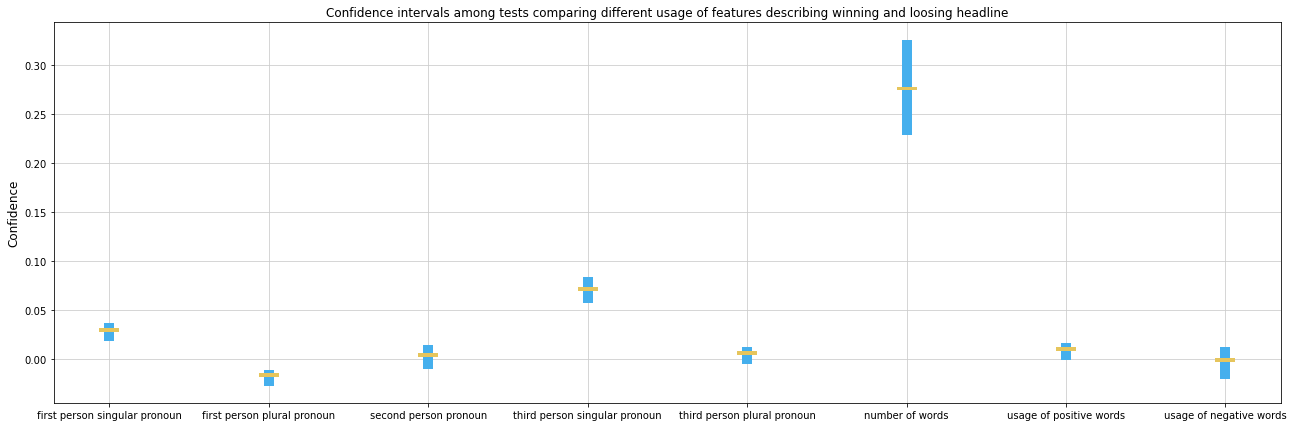

In [ ]:
from matplotlib import pyplot as plt
from copy import copy

data_plot_cp = copy(data_plot)
xe = ['number of words', 'usage of positive words', 'usage of negative words']
for x, x_data in zip(xe, [ratio_num_words_ci_mean, positive_ratio_ci_mean, negative_ratio_ci_mean]):
    data_plot_cp[x] = x_data

fig = plt.figure(figsize=(22, 7))

for key, values in data_plot_cp.items():
    ymin, ymax, mean = values
    plt.vlines(key, ymin=ymin, ymax=ymax, color='#45afed', lw=10)
    plt.vlines(key, ymin=mean, ymax=mean+0.004, color='#e6c55c', lw=20)

plt.grid(True, c="#ccc")
plt.ylabel('Confidence', size=12)
plt.title("Confidence intervals among tests comparing different usage of features describing winning and loosing headline")


## Task 3.9

**Discuss:** According to the results obtained in **T3.8**, what headlines grab people's attention the most? Justify your answer.

Longer headlines grab people's attention the most, because the mean difference among the winning and loosing is the highest between studied criteria. We further conclude that a usage of different pronouns doesn't influence the titles' attention that much, because their confidence interval overlap with each other, with mean close to 0. This also can be said about the mean in difference in usage of negative word and the mean in difference of positive words. Concluding the most influential criterium of deciding whether the headline grabs people attention is the number of words used in that headline since the difference between the winning and loosing headline has the highest mean average.

## Task 4: Temporal validity and heterogeneity of the effect.

Last, we investigate how the effects studied in **T3** change with time and how they might be heterogeneous across different types of news.

## Task 4.1

Create a plot where you depict the monthly average number of words in winner and loser headlines. Consider only headlines created after April 2013 (the month of April inclusive). Include also bootstrapped 95% confidence intervals; here, you can use a third-party implementation if you want. Finally, recall that we created a column `date_created` which captures the creation of the winner headline; you can consider this date to correspond to the date of the creation of the A/B test.

In [12]:
from scipy.stats import bootstrap
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Compute the number of words in winner and loser headlines.
def compute_length_per_row(row):
    row['headline1'] = count_words_simple(row['headline1'])
    row['headline2'] = count_words_simple(row['headline2'])
    return row

# Create the confidence intervals for a given data set. 
def create_confidence_interval(data):
    #convert array to sequence
    data = (data,)

    #calculate 95% bootstrapped confidence interval for median
    bootstrap_ci = bootstrap(data, np.mean, confidence_level=0.95,
                             random_state=1, method='percentile')

    return bootstrap_ci.confidence_interval

def create_evolution_targeted_metrics_per_month(data, timelimit, columns):
    # Filter only the data that is after 'timelimit'
    data_per_month = data[data.date_created >= timelimit]
    
    # Group by month and year
    groupped_by_date = data_per_month.groupby(by=[data_per_month.date_created.dt.year,data_per_month.date_created.dt.month])
    
    # Calculate the mean for each group
    mean_per_month = groupped_by_date.mean()
    mean_per_month.index = mean_per_month.index.map(lambda index : datetime.datetime(index[0], index[1], 1))
    
    # Gather all samples within a group to compute the confidence intervals with bootstraping
    confidence_intervals = groupped_by_date.agg(list)[columns]
    
    for column in columns:
        # Compute the confidence intervals for each group into a separate dataframe with only the confidence intervals
        confidence_intervals['confidence_' + column] = confidence_intervals.apply(lambda row: create_confidence_interval(row[column]), axis=1)
        confidence_intervals['confidence_' + column + '_low'] = confidence_intervals.apply(lambda row: row['confidence_' + column][0], axis=1)
        confidence_intervals['confidence_' + column + '_high'] = confidence_intervals.apply(lambda row: row['confidence_' + column][1], axis=1)


    confidence_intervals = confidence_intervals.drop(columns, axis=1)
    confidence_intervals = confidence_intervals.drop(['confidence_' + col for col in columns], axis=1)
    # Create the index as the datatime between month and year
    confidence_intervals.index = confidence_intervals.index.map(lambda index : datetime.datetime(index[0], index[1], 1))
    
    # Merge the mean with its correspongin confidence interval per group
    mean_per_month = mean_per_month.merge(confidence_intervals, left_index=True, right_index=True)
    mean_per_month = mean_per_month.reset_index()
    
    return mean_per_month

# Plot the data found in 'data' object, including confidence intervals. 
def plot_evolution(ax, data, x_axis, y_axis, loc):
    for (y, color, label) in y_axis:
        ax.plot(data[x_axis], data[y], label=label, color=color)
        ax.plot(data[x_axis], data['confidence_' + y + '_low'], color= color, alpha=0.1)
        ax.plot(data[x_axis], data['confidence_' + y + '_high'], color=color, alpha=0.1)
        ax.fill_between(data[x_axis], data['confidence_' + y + '_low'], data['confidence_' + y + '_high'], color=color, alpha=0.2)

    ax.set_facecolor("white")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc=loc)

    ax.set_xlabel('Date')
    ax.set_ylabel('Mean of word counts')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    
 

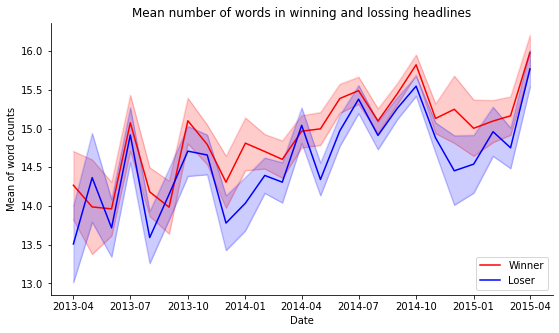

In [13]:
data_with_metrics = headline_pairs.apply(compute_length_per_row, axis=1)
evolution_mean_nr_words = create_evolution_targeted_metrics_per_month(data_with_metrics, '2013-04-01', ['headline1', 'headline2'])
fig, ax = plt.subplots(figsize=(9,5))
plot_evolution(ax, evolution_mean_nr_words, 'level_0', [
    ('headline1', 'red', 'Winner'),
    ('headline2', 'blue', 'Loser')
], 'lower right')
plt.title('Mean number of words in winning and lossing headlines')
plt.show()

## Task 4.2

Produce similar plots to each pronoun category, as well as for positive and negative sentiment. Here, unlike in **T4.1**, depict the month averages pooled across winner and loser headlines (i.e., for each month, you calculate the average across both winners and loser headlines).
Create all these plots in a single figure with no more than 11 inches of width and 11 inches of height. Again, consider only headlines created after April 2013 (the month of April inclusive).

In [14]:
import re
import requests

# Compute the number of words in winning and losing headlines for each word category
def add_word_categories_count(data):
    for key in feature_wordsets.keys():
        data[key + "_count_1"] = data.headline1.apply(lambda x : len([y for y in x.split(" ") if y.lower() in feature_wordsets[key]]))
        data[key + "_count_2"] = data.headline2.apply(lambda x : len([y for y in x.split(" ") if y.lower() in feature_wordsets[key]]))
        data[key + "_count"] = data[key + "_count_1"] + data[key + "_count_2"]
        data[key + "difference_count"] = data[key + "_count_1"] - data[key + "_count_2"]

    pattern = ';.*\n'
    positive_content = requests.get('https://ptrckprry.com/course/ssd/data/positive-words.txt')
    positive_wordset = re.sub(pattern, '', positive_content.text).split('\n')[1:-1]
    negative_content = requests.get('https://ptrckprry.com/course/ssd/data/negative-words.txt')
    negative_wordset = re.sub(pattern, '', negative_content.text).split('\n')[1:-1]

    data['positive_count_1'] = data.headline1.apply(lambda x : len([y for y in positive_wordset if y in x]))
    data['positive_count_2'] = data.headline2.apply(lambda x : len([y for y in positive_wordset if y in x]))
    data['positive_count'] = data['positive_count_1'] + data['positive_count_2']
    data['positive_difference_count'] = data['positive_count_1'] - data['positive_count_2']
    
    data['negative_count_1'] = data.headline1.apply(lambda x : len([y for y in negative_wordset if y in x]))
    data['negative_count_2'] = data.headline2.apply(lambda x : len([y for y in negative_wordset if y in x]))
    data['negative_count'] = data['negative_count_1'] + data['negative_count_2']
    data['negative_difference_count'] = data['negative_count_1'] - data['negative_count_2']
    return data

# Enrich the dataframe with the number of words from a specific category for winning and losing headlines
count_data = add_word_categories_count(headline_pairs)

# Define the features that will be considered when performing the analysis for Task 4.2 
features_considered = [key + '_count' for key in feature_wordsets.keys()]
features_considered.append('positive_count')
features_considered.append('negative_count')

features_evolution_per_month = create_evolution_targeted_metrics_per_month(count_data, '2013-04-01', features_considered)

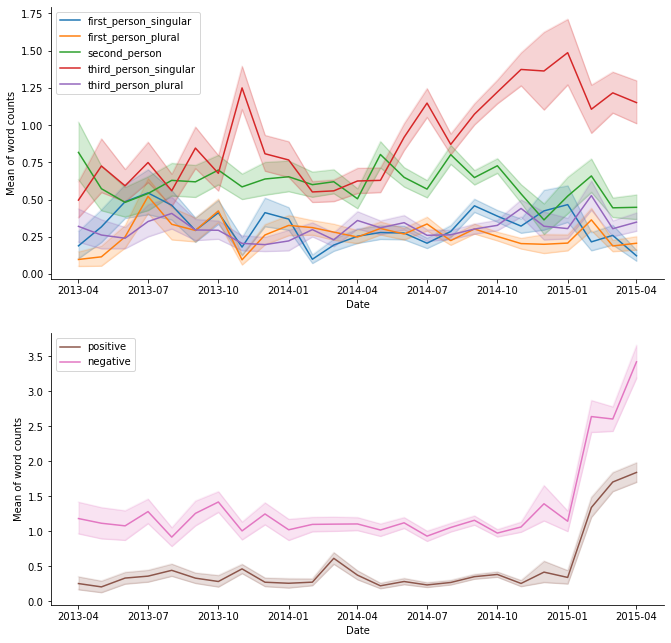

In [15]:
# Define different colors used for plotting
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

# Plot for Task 4.2
fig, axs = plt.subplots(nrows=2, figsize=(11,11))
features_color = list(zip(features_considered, colors))
details_pronomns = [(feature, color, feature[:-6]) for (feature, color) in features_color ]

plot_evolution(axs[0], features_evolution_per_month, 'level_0', details_pronomns[:-2], 'upper left')
plot_evolution(axs[1], features_evolution_per_month, 'level_0', details_pronomns[-2:], 'upper left')
plt.show()

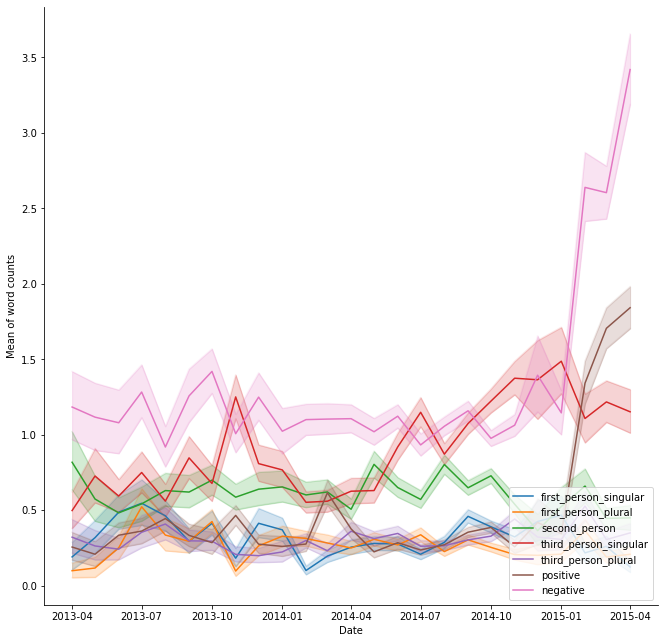

In [16]:
fig, ax = plt.subplots(figsize=(11,11))
plot_evolution(ax, features_evolution_per_month, 'level_0', details_pronomns, 'lower right')
plt.show()

## Task 4.3

**Discuss:** Has the type of headline Upworthy used in their A/B tests changed with time? Are these changes likely to be producing more or less engaging headlines? Justify.

From the graph ploting the number of words for both winner and losing headlines we can see that both winner and losing headlines have an ascending trend. This means that, on average, the number of words for headlines has risen from April 2013 (approx 13.5 for loser and ~14.25 for winning) to April 2015 (approx 15.75 for losing and approx 16 for winners). This suggest that Upworthy are using longer headlines for their testing.

When looking on how the mean of negative and positive words have changed throughout time, and interesting observation can be drawn. Even though the mean for both positive and negative words count seemed to be constant from April 2013 to January 2015, it started to rise rapidly from January 2015 to April 2014. This means that Upworthy started to use headlines that containt more words that convey a form of emotion. 

In order to understand the evolution of the prenoums used, we studied the plot from 4.2. In April 2013 second person and third person singular were the preffered pronoums, but from April 2014 the mean for third person pronoums started rising significantly. By the end of April 2015, there is a clear difference between the number of pronoums used from third person singular and all the others. This shows us that Upworthy started to choose  mostly more impersonal headlines for their test, since the number of third person singular pronoums has risen so much in comparison to the others, which remained fairly constant throughtout time.

## Task 4.4

Divide your data into two periods, $t_1$, which goes from  April 2013 (inclusive) to March 2014 (inclusive), and $t_2$, which goes from April 2014 (inclusive) to the latest A/B test in the data. Create a dataframe for A/B tests in each period.

In [17]:
# Split the data into the 2 specified time periods
def split_intervals(data):
    afterApril = data.loc[data.date_created >= '2013-04-01']
    t1 = afterApril.loc[afterApril.date_created <= '2014-03-31']
    t2 = data.loc[data.date_created >= '2014-04-01']
    
    t1 = t1.groupby(by=[t1.date_created.dt.year,t1.date_created.dt.month]).mean()
    t2 = t2.groupby(by=[t2.date_created.dt.year,t2.date_created.dt.month]).mean()
    return (t1, t2)

In [18]:
(t1, t2) = split_intervals(count_data)

## Task 4.5

Let's examine if the effects observed remained the same throughout the study period. Use an appropriate methodology  of your choice to determine if the effects observed in **T3.8** (length, each category of pronouns, positive words, and negative words) were different in $t_1$ and $t_2$. Here, note that we are considering "at least one positive outcome" to be the manifestation of an underlying effect, thus significance level must be adjusted down when performing multiple hypothesis tests!

In [19]:
from scipy.stats import ttest_rel

# Calculate the ttests for testig if the effect observed in T3.8 have changed during the 2 periods of time.
# Used multiple hypothesis testing as the metodology.
potivie_count_difference_t1 = t1['positive_count_1'] - t1['positive_count_2']
potivie_count_difference_t2 = t2['positive_count_1'] - t2['positive_count_2']
t, p = ttest_rel(potivie_count_difference_t1.values, potivie_count_difference_t2.values[:-1],  alternative='greater')
print("P-value for difference in positive count: " + str(p))

negative_count_difference_t1 = t1['negative_count_1'] - t1['negative_count_2']
negative_count_difference_t2 = t2['negative_count_1'] - t2['negative_count_2']
t, p = ttest_rel(negative_count_difference_t1.values, negative_count_difference_t2.values[:-1],  alternative='greater')
print("P-value for difference in negative count: " + str(p))

first_sg_count_difference_t1 = t1['first_person_singular_count_1'] - t1['first_person_singular_count_2']
first_sg_count_difference_t2 = t2['first_person_singular_count_1'] - t2['first_person_singular_count_2']
t, p = ttest_rel(first_sg_count_difference_t1.values, first_sg_count_difference_t2.values[:-1],  alternative='greater')
print("P-value for difference in First Singular Pronoums count: " + str(p))

first_pl_count_difference_t1 = t1['first_person_plural_count_1'] - t1['first_person_plural_count_2']
first_pl_count_difference_t2 = t2['first_person_plural_count_1'] - t2['first_person_plural_count_2']
t, p = ttest_rel(first_pl_count_difference_t1.values, first_pl_count_difference_t2.values[:-1],  alternative='greater')
print("P-value for difference in First Plural Pronoums count: " + str(p))

second_count_difference_t1 = t1['second_person_count_1'] - t1['second_person_count_2']
second_count_difference_t2 = t2['second_person_count_1'] - t2['second_person_count_2']
t, p = ttest_rel(second_count_difference_t1.values, second_count_difference_t2.values[:-1],  alternative='greater')
print("P-value for difference in Second Pronoums count: " + str(p))

third_sg_count_difference_t1 = t1['third_person_singular_count_1'] - t1['third_person_singular_count_2']
third_sg_count_difference_t2 = t2['third_person_singular_count_1'] - t2['third_person_singular_count_2']
t, p = ttest_rel(third_sg_count_difference_t1.values, third_sg_count_difference_t2.values[:-1],  alternative='greater')
print("P-value for difference in Third Singular Pronoums count: " + str(p))

third_pl_count_difference_t1 = t1['third_person_plural_count_1'] - t1['third_person_plural_count_2']
third_pl_count_difference_t2 = t2['third_person_plural_count_1'] - t2['third_person_plural_count_2']
t, p = ttest_rel(third_pl_count_difference_t1.values, third_pl_count_difference_t2.values[1:],  alternative='greater')
print("P-value for difference in Third Plural Pronoums count: " + str(p))

length_count_difference_t1 = t1['numwords1'] / t1['numwords2']
lentgh_count_difference_t2 = t2['numwords1'] / t2['numwords2']
t, p = ttest_rel(second_count_difference_t1.values, second_count_difference_t2.values[:-1],  alternative='greater')
print("P-value for difference in Length count: " + str(p))

P-value for difference in positive count: 0.17823705222153985
P-value for difference in negative count: 0.3487806021242548
P-value for difference in First Singular Pronoums count: 0.9523281082092325
P-value for difference in First Plural Pronoums count: 0.35105230347816907
P-value for difference in Second Pronoums count: 0.4417891007389228
P-value for difference in Third Singular Pronoums count: 0.6774753903614863
P-value for difference in Third Plural Pronoums count: 0.049626721677265534
P-value for difference in Length count: 0.4417891007389228


## Task 4.6

**Discuss:** Hypothesize two reasons that could have led to a change in the observed effects. According to the analysis done in **T4.5**, have the effects observed remained the same across the study period?

For the Third Plural Pronoums we obtain a p-value of 0.0496, which means that we can reject the null-hypotesis that the effect of third plural is constant throughout the two time periods t1 and t2, because the p-value is smaller than the level of significance α = 0.05, so the effect of Third Plural Pronoums changed from t1 to t2. Thus, based on only this, we could conclude that the effects did not remain the same throughout the study period.

However, the probability of observing at least one significant result just due to chance is 
P = 1 - (1 - 0.05) ^ 8 = 0.33

We will apply The Bonferroni correction to sets the significance cut-off at α/n = 0.05 / 8 = 0.00625. By doing this, now the probability to obtain at least one change due to change is 
P = 1 - (1 - 0.00625) ^ 8  = 0.048, really close to our desired 0.05

Using this correction, and because all the p-values obtained are above the established threshold of 0.00625, we can conclude that the effects remained the same throughout the syudy period.






One hypothesis that might have led to a change in the observed effects might be that, between t1 and t2, there might have been an event that might have influence the users behaviour to choose more positive headlines over negative headlines (no-hate movement, politically corectness etc). In this way, the difference between the winning and losing headlines in terms of positive words would rise. 

Another hypothesis is that maybe that might have been a change in how the public prefers the article to approach a certain topic. Maybe the public's perception converges to something more formal, since accuracy is becoming more and more important due to the impact of fake news. This might led to an increase in the difference of the number of third person pronoumns in the winning headlines in comparison to losing headlines.

However, these hyphotesis are cancelled since there is no difference in the observed effects between the two periods of time.



## Task 4.7

The features we are studying may interact with each other. For instance, people may like first person singular pronouns in headlines containing positive words (you are amazing!), but dislike headlines with negative words and first person pronouns (you are awful!). To help answer this question, create:
- a dataframe containing all A/B tests where both winner and loser headlines include a positive word; and
- a dataframe containing all A/B tests where both winner and loser headlines include a negative word;

In [20]:
def compare_both(data):
    positive_both = data[data['positive1'] == 1]
    positive_both = positive_both[positive_both['positive2'] == 1]
    negative_both = data[data['negative1'] == 1]
    negative_both = negative_both[negative_both['negative2'] == 1]
    return (positive_both, negative_both)

In [21]:
positive_both, negative_both = compare_both(headline_pairs)

## Task 4.8

Using an appropriate methodology of your choice, determine if the effect of the use of first person singular pronouns in the headline is heterogeneous across headlines with positive words and negative words, i.e., is the effect significantly stronger for one of the dataframes created in **T4.7**?

In [22]:
#bootstrapping
positive = positive_both['first_person_singular_count_1'] - positive_both['first_person_singular_count_2']
positive_difference=pd.DataFrame({'mean_first_count':[positive.sample(positive.shape[0],replace=True).mean() for i in range(0,10000)]})


In [23]:
#bootstrapping
negative =  negative_both['first_person_singular_count_1'] - negative_both['first_person_singular_count_2']
negative_difference=pd.DataFrame({'mean_first_count':[negative.sample(negative.shape[0],replace=True).mean() for i in range(0,10000)]})


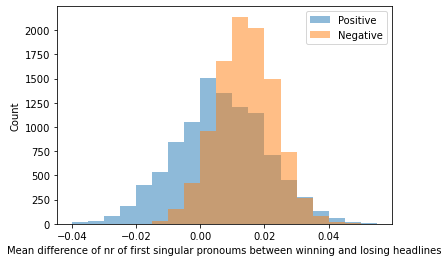

In [24]:
# Plot the boostraped distribution to compare the 2 different effects of first singular pronoums
bins = [x / 1000 for x in range(-40, 60, 5)]

plt.hist(positive_difference['mean_first_count'], bins, alpha=0.5, label='Positive')
plt.hist(negative_difference['mean_first_count'], bins, alpha=0.5, label='Negative')
plt.xlabel("Mean difference of nr of first singular pronoums between winning and losing headlines")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.show()

From the histogram above, we can conclude that for headlines using negative words, first singular pronoumns are more prevalent in winning headlines than in losing headlines. For positive words, the most frequent mean of the difference between the number of first singular pronoumns among winning and losing headlines is close to 0, which indicates that the effect of first singular pronoums among negative and positive headlines is heterogeneous.

This observation totally makes sense. I think we are more inclined to access a webiste that is using first singular prenoums along with negative words because it is an attack on our own sense and the outrage that it provokes determine us to click on that headline to read more.

## Task 4.9

**Discuss:** Considering the analyses you did throughout Tasks 3 and 4, write a short text (no more than 250 words) giving advice to Upworthy employees on how they should try to write engaging headlines.
You can reference images present in the notebook by indicating a task (e.g., image plotted in **T3.3**) or a cell number. Note that you do not need to conduct any additional analysis to write this text.

After performing all this analysis on the headlines used by Upworthy, there are some conclusions that can be drawn to increase the engagement of the users:
1. Longer headlines are more likely to draw the attention of the user. This effect is captured in the graph from Task 4.1, where we can see that, across the whole period of time, the mean of the clickability rate is constantly bigger for longer headlines.
2. Negative words can be combined with first singular pronoums to produce a deeper effect on the audience, as we have shown in the figure from Task 4.8. 
3. In task 3, we have shown that the use of third person singular pronoums has the biggest mean difference among winning and losing headlines, which suggest that more impersonal and informal headlines tend to generally draw more attention.
4. Since we have obtained a negative mean for the difference between first person plural pronoums in winning and losing headlines we can deduct that a headline containg words like 'we', 'our' are more likely to be a losing headline.
5. From task 4.5 we have observed that the effects tend to remain constant throughtout time, so one advice would be to keep a constant strategy in choosing how to construct a winning headline, since the public is keeping its behaviour fairly constant.